In [1]:
# import pandas library 
import pandas as pd 
  
# Get the data 
column_names = ['user_id', 'item_id', 'rating', 'timestamp'] 
  
path = 'file.tsv'
  
df = pd.read_csv(path, sep='\t', names=column_names) 
  
# Check the head of the data 
df.head()


,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [64]:
df.shape

(100003, 4)

In [2]:
# Check out all the movies and their respective IDs 
movie_titles = pd.read_csv('Movie_Id_Titles.csv') 
movie_titles.head() 

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [117]:
# changed to Sframe to later join with the recommendor to get the title based on the item id
movies = tc.SFrame.read_csv("Movie_Id_Titles.csv", header=True,
                                delimiter=',')

Finished parsing file /mnt/d/DigitalVidya/MachineLearning/Chapter10_RecommedorSystems/Assignment/Movie_Id_Titles.csv

Parsing completed. Parsed 100 lines in 0.155541 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /mnt/d/DigitalVidya/MachineLearning/Chapter10_RecommedorSystems/Assignment/Movie_Id_Titles.csv

Parsing completed. Parsed 1682 lines in 0.148663 secs.

In [118]:
movies

item_id,title
1,Toy Story (1995)
2,GoldenEye (1995)
3,Four Rooms (1995)
4,Get Shorty (1995)
5,Copycat (1995)
6,Shanghai Triad (Yao a yaoyao dao waipo qiao) ...
7,Twelve Monkeys (1995)
8,Babe (1995)
9,Dead Man Walking (1995)
10,Richard III (1995)


In [3]:

data = pd.merge(df, movie_titles, on='item_id') 
data.head()
 

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [136]:
# data[data['item_id']==50]

In [5]:

# Calculate mean rating of all movies 
data.groupby('title')['rating'].mean().sort_values(ascending=False).head() 


title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [41]:

# Calculate count rating of all movies 
data.groupby('title')['rating'].count().sort_values(ascending=True).head(30)

title
Á köldum klaka (Cold Fever) (1994)                   1
Mille bolle blu (1993)                               1
Mat' i syn (1997)                                    1
Marlene Dietrich: Shadow and Light (1996)            1
Man from Down Under, The (1943)                      1
Mamma Roma (1962)                                    1
Mad Dog Time (1996)                                  1
Big Bang Theory, The (1994)                          1
MURDER and murder (1996)                             1
Coldblooded (1995)                                   1
Low Life, The (1994)                                 1
Love Is All There Is (1996)                          1
Lotto Land (1995)                                    1
Bird of Prey (1996)                                  1
Liebelei (1933)                                      1
Leopard Son, The (1996)                              1
Lashou shentan (1992)                                1
Land and Freedom (Tierra y libertad) (1995)          1
Lady

In [7]:
# creating dataframe with 'rating' count values 
ratings = pd.DataFrame(data.groupby('title')['rating'].mean())  
  
ratings['num of ratings'] = pd.DataFrame(data.groupby('title')['rating'].count()) 
  
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [51]:
ratings = pd.merge(ratings, movie_titles, on='title')

In [52]:
ratings

,title,rating,num of ratings,item_id
0,'Til There Was You (1997),2.333333,9,1300
1,1-900 (1994),2.600000,5,1353
2,101 Dalmatians (1996),2.908257,109,225
3,12 Angry Men (1957),4.344000,125,178
4,187 (1997),3.024390,41,330
...,...,...,...,...
1677,Young Guns II (1990),2.772727,44,1188
1678,"Young Poisoner's Handbook, The (1995)",3.341463,41,547
1679,Zeus and Roxanne (1997),2.166667,6,1164
1680,unknown,3.444444,9,267


In [58]:
a = []
a = ratings['item_id'][ratings['num of ratings']<10]

In [65]:
a = a.tolist()

In [137]:
# a

In [68]:
#removing item ids where the ratings were less than 10
data = data[~data.item_id.isin(a)]
# new_df = sales[~sales.CustomerID.isin(badcu)]

In [76]:
# data[data['item_id']==1362]

,user_id,item_id,rating,timestamp,title


<AxesSubplot:>

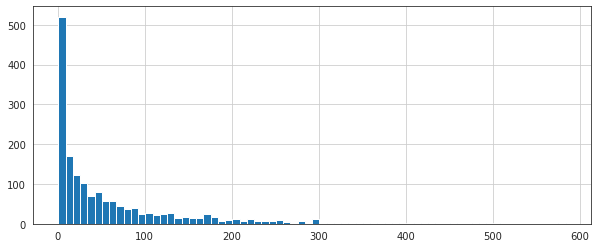

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns 
  
sns.set_style('white') 

# plot graph of 'num of ratings column' 
plt.figure(figsize =(10, 4)) 
  
ratings['num of ratings'].hist(bins = 70) 


In [10]:
# ! pip3 install matplotlib
# ! pip3 install seaborn

<AxesSubplot:>

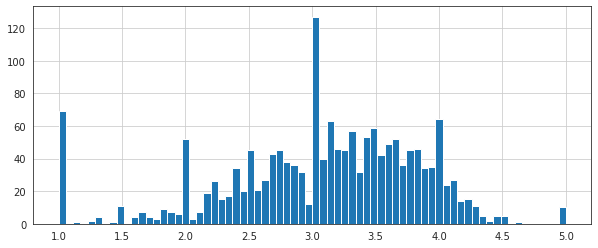

In [11]:

# plot graph of 'ratings' column 
plt.figure(figsize =(10, 4)) 
  
ratings['rating'].hist(bins = 70)

In [77]:

# Sorting values according to  
# the 'num of rating column' 
moviemat = data.pivot_table(index ='user_id', 
              columns ='item_id', values ='rating') 
  
moviemat.head() 
  
# ratings.sort_values('num of ratings', ascending = False).head(10) 


item_id,1,2,3,4,5,6,7,8,9,10,...,1451,1469,1478,1480,1483,1503,1518,1540,1606,1615
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
# moviemat.columns == 1615

array([False, False, False, ..., False, False,  True])

In [78]:
data

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
...,...,...,...,...,...
99772,854,1335,2,882812288,American Buffalo (1996)
99773,833,1335,2,875038433,American Buffalo (1996)
99774,458,1335,1,886395565,American Buffalo (1996)
99775,936,1335,4,886833325,American Buffalo (1996)


In [13]:
moviemat.shape

(944, 1664)

In [91]:
d = moviemat.reset_index()

In [92]:
d = pd.melt(d, id_vars=['user_id'], value_name='rating').dropna()

In [95]:
d

,user_id,item_id,rating
1,1,1,5.0
2,2,1,4.0
5,5,1,4.0
6,6,1,4.0
10,10,1,4.0
...,...,...,...
1089181,749,1615,4.0
1089214,782,1615,3.0
1089236,804,1615,4.0
1089239,807,1615,4.0


In [94]:
# d[d['item_id']==1250]

,user_id,item_id,rating


In [17]:
ratings.sort_values('num of ratings', ascending = False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [18]:

# analysing correlation with similar movies 
starwars_user_ratings = moviemat['Star Wars (1977)'] 
liarliar_user_ratings = moviemat['Liar Liar (1997)'] 
  
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [19]:

# analysing correlation with similar movies 
similar_to_starwars = moviemat.corrwith(starwars_user_ratings) 
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings) 
  
corr_starwars = pd.DataFrame(similar_to_starwars, columns =['Correlation']) 
corr_starwars.dropna(inplace = True) 
  
corr_starwars.head()

/mnt/d/DigitalVidya/MyEnv/lib/python3.7/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/mnt/d/DigitalVidya/MyEnv/lib/python3.7/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [20]:

# Similar movies like starwars 
corr_starwars.sort_values('Correlation', ascending = False).head(10) 
# corr_starwars = corr_starwars.join(ratings['num of ratings']) 
  
# corr_starwars.head() 
  
# corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation', ascending = False).head() 


,Correlation
title,
Hollow Reed (1996),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
"Beans of Egypt, Maine, The (1994)",1.0
Safe Passage (1994),1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
"Outlaw, The (1943)",1.0
"Line King: Al Hirschfeld, The (1996)",1.0
Hurricane Streets (1998),1.0


In [21]:
corr_starwars = corr_starwars.join(ratings['num of ratings']) 
  
corr_starwars.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [22]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation', ascending = False).head()

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [23]:

# Similar movies as of liarliar 
corr_liarliar = pd.DataFrame(similar_to_liarliar, columns =['Correlation']) 
corr_liarliar.dropna(inplace = True) 
  
corr_liarliar = corr_liarliar.join(ratings['num of ratings']) 
corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('Correlation', ascending = False).head()


,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137


In [24]:
### Assignment generate movie recommendations for different users using turicreate package

In [113]:
# list of users will be provided to the model in list format without duplicates
list_of_users = df['user_id'].to_list()
list_of_users = list(set(list_of_users))

In [138]:
# list_of_users

In [96]:
from sklearn.model_selection  import train_test_split

In [97]:
import turicreate as tc

In [101]:
train, test = train_test_split(d, test_size = .2)
print(train.shape, test.shape)

(78372, 3) (19593, 3)


In [102]:
train_data = tc.SFrame(train)
test_data = tc.SFrame(test)

In [103]:
train_data

user_id,item_id,rating
408,300,3.0
373,435,4.0
154,182,5.0
268,562,4.0
930,274,4.0
21,717,1.0
429,673,3.0
582,455,1.0
882,427,5.0
716,836,4.0


In [106]:
popularity_model = tc.popularity_recommender.create(train_data,'user_id','item_id','rating')

Preparing data set.

Data has 78372 observations with 944 users and 1154 items.

Data prepared in: 0.180395s

78372 observations to process; with 1154 unique items.

In [121]:
popularity_recomm = popularity_model.recommend(users=list_of_users, k=7)
popularity_recomm = popularity_recomm.join(right=movies,on={'item_id':'item_id'},how='inner').sort(['user_id','rank'], ascending=True)
popularity_recomm.print_rows(30)

+---------+---------+-------------------+------+-------------------------------+
| user_id | item_id |       score       | rank |             title             |
+---------+---------+-------------------+------+-------------------------------+
|    0    |   408   | 4.568181818181818 |  1   |     Close Shave, A (1995)     |
|    0    |   114   | 4.528301886792453 |  2   | Wallace & Gromit: The Best... |
|    0    |   1169  |        4.5        |  3   |          Fresh (1994)         |
|    0    |   318   |  4.48051948051948 |  4   |    Schindler's List (1993)    |
|    0    |    64   | 4.440528634361233 |  5   | Shawshank Redemption, The ... |
|    0    |   483   | 4.427835051546392 |  6   |       Casablanca (1942)       |
|    0    |    12   | 4.416666666666667 |  7   |   Usual Suspects, The (1995)  |
|    1    |   408   | 4.568181818181818 |  1   |     Close Shave, A (1995)     |
|    1    |   1169  |        4.5        |  2   |          Fresh (1994)         |
|    1    |   318   |  4.480

In [123]:
def model(train_data, name, user_id, item_id, target, users_to_recommend, n_rec, n_display):
    if name == 'popularity':
        model = tc.popularity_recommender.create(train_data, 
                                                    user_id=user_id, 
                                                    item_id=item_id, 
                                                    target=target)
    elif name == 'cosine':
        model = tc.item_similarity_recommender.create(train_data, 
                                                    user_id=user_id, 
                                                    item_id=item_id, 
                                                    target=target, 
                                                    similarity_type='cosine')
    elif name == 'pearson':
        model = tc.item_similarity_recommender.create(train_data, 
                                                    user_id=user_id, 
                                                    item_id=item_id, 
                                                    target=target, 
                                                    similarity_type='pearson')
        
    recom = model.recommend(users=users_to_recommend, k=n_rec)
    recom = recom.join(right=movies,on={'item_id':'item_id'},how='inner').sort(['user_id','rank'], ascending=True)
    recom.print_rows(n_display)
    return model

In [124]:
name = 'cosine'
cos = model(train_data, name, 'user_id','item_id','rating', list_of_users, 7, 30)

Preparing data set.

Data has 78372 observations with 944 users and 1154 items.

Data prepared in: 0.147263s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 25.995ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 82.754ms                            | 0                | 0               |

| 259.641ms                           | 100              | 1154            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 1.30314s

+---------+---------+---------------------+------+
| user_id | item_id |        score        | rank |
+---------+---------+---------------------+------+
|    0    |   174   |  1.861660897731781  |  1   |
|    0    |   204   |  1.7170284390449524 |  2   |
|    0    |    98   |  1.6720547080039978 |  3   |
|    0    |   173   |  1.656724363565445  |  4   |
|    0    |   132   |  1.637027382850647  |  5   |
|    0    |    82   |  1.6156041026115417 |  6   |
|    0    |   210   |  1.6008689999580383 |  7   |
|    1    |   204   |  0.8460731140657324 |  1   |
|    1    |   423   |  0.8355385931793619 |  2   |
|    1    |   172   |  0.8137736242750416 |  3   |
|    1    |    4    |  0.663342423197152  |  4   |
|    1    |   568   |  0.6484972437222799 |  5   |
|    1    |   385   |  0.627461668373882  |  6   |
|    1    |   161   |  0.6144276226776234 |  7   |
|    2    |   100   |  1.066667995669625  |  1   |
|    2    |   181   |  0.8050469011068344 |  2   |
|    2    |   117   |  0.714745

In [125]:
name = 'pearson'
pear = model(train_data, name, 'user_id','item_id','rating', list_of_users, 7, 30)

Preparing data set.

Data has 78372 observations with 944 users and 1154 items.

Data prepared in: 0.143104s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 6.957ms                        | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 21.878ms                            | 0                | 0               |

| 480.776ms                           | 100              | 1154            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.526288s

+---------+---------+--------------------+------+-------------------------------+
| user_id | item_id |       score        | rank |             title             |
+---------+---------+--------------------+------+-------------------------------+
|    0    |   408   | 4.568181818181819  |  1   |     Close Shave, A (1995)     |
|    0    |    50   | 4.557437788991251  |  2   |        Star Wars (1977)       |
|    0    |   114   | 4.528301886792455  |  3   | Wallace & Gromit: The Best... |
|    0    |    64   | 4.509284827283819  |  4   | Shawshank Redemption, The ... |
|    0    |   1169  |        4.5         |  5   |          Fresh (1994)         |
|    0    |    12   | 4.416666666666666  |  6   |   Usual Suspects, The (1995)  |
|    0    |   966   | 4.409090909090908  |  7   | Affair to Remember, An (1957) |
|    1    |   408   | 4.5722855346266735 |  1   |     Close Shave, A (1995)     |
|    1    |   1169  | 4.503112601197285  |  2   |          Fresh (1994)         |
|    1    |   31

In [126]:
models_w_counts = [popularity_model, cos, pear]
names_w_counts = ['Popularity Model on Movie Reco', 'Cosine Similarity on movie Reco', 'Pearson Similarity on movie reco']

In [127]:
eval_counts = tc.recommender.util.compare_models(test_data, models_w_counts, model_names=names_w_counts)

PROGRESS: Evaluate model Popularity Model on Movie Reco

Precision and recall summary statistics by cutoff
+--------+----------------------+----------------------+
| cutoff |    mean_precision    |     mean_recall      |
+--------+----------------------+----------------------+
|   1    | 0.03075291622481443  | 0.001385489713793604 |
|   2    | 0.022799575821845178 | 0.002355967525252147 |
|   3    | 0.024743725698126537 | 0.003041305569791712 |
|   4    | 0.04878048780487805  | 0.008816791700545577 |
|   5    |  0.0528101802757158  | 0.011438174474977171 |
|   6    | 0.05249204665959704  | 0.013330975646816472 |
|   7    | 0.05241630056052114  | 0.014960680452994608 |
|   8    | 0.05328738069989396  | 0.017032872341148444 |
|   9    | 0.05396488747496173  | 0.019328148212934933 |
|   10   | 0.05524920466595973  |  0.0228102532642701  |
+--------+----------------------+----------------------+
[10 rows x 3 columns]


Overall RMSE: 1.013046589303415

Per User RMSE (best)
+---------+------

# We see that pearson similarity performed better that cosine and popularity hence we will choose pearson similarity as the final model

In [128]:
final_model = tc.item_similarity_recommender.create(train_data, 
                                           'user_id','item_id','rating',
                                            similarity_type='cosine')

recom = final_model.recommend(list_of_users, 7)
recom = recom.join(right=movies,on={'item_id':'item_id'},how='inner').sort(['user_id','rank'], ascending=True)
recom.print_rows(20)
# pear = model(train_data, name, 'user_id','item_id','rating', list_of_users, 7, 30)

Preparing data set.

Data has 78372 observations with 944 users and 1154 items.

Data prepared in: 0.284899s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 9.409ms                        | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 24.672ms                            | 0                | 0               |

| 145.251ms                           | 100              | 1154            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.164846s

+---------+---------+--------------------+------+--------------------------------+
| user_id | item_id |       score        | rank |             title              |
+---------+---------+--------------------+------+--------------------------------+
|    0    |   174   | 1.861660897731781  |  1   | Raiders of the Lost Ark (1981) |
|    0    |   204   | 1.7170284390449524 |  2   |   Back to the Future (1985)    |
|    0    |    98   | 1.6720547080039978 |  3   | Silence of the Lambs, The ...  |
|    0    |   173   | 1.656724363565445  |  4   |   Princess Bride, The (1987)   |
|    0    |   132   | 1.637027382850647  |  5   |    Wizard of Oz, The (1939)    |
|    0    |    82   | 1.6156041026115417 |  6   |      Jurassic Park (1993)      |
|    0    |   210   | 1.6008689999580383 |  7   | Indiana Jones and the Last...  |
|    1    |   204   | 0.8538230611506291 |  1   |   Back to the Future (1985)    |
|    1    |   423   | 0.814172371286125  |  2   | E.T. the Extra-Terrestrial...  |
|   

In [130]:
df_rec = recom.to_dataframe()
print(df_rec.shape)
df_rec.head(10)

(6608, 5)


,user_id,item_id,score,rank,title
0,0,174,1.861661,1,Raiders of the Lost Ark (1981)
1,0,204,1.717028,2,Back to the Future (1985)
2,0,98,1.672055,3,"Silence of the Lambs, The (1991)"
3,0,173,1.656724,4,"Princess Bride, The (1987)"
4,0,132,1.637027,5,"Wizard of Oz, The (1939)"
5,0,82,1.615604,6,Jurassic Park (1993)
6,0,210,1.600869,7,Indiana Jones and the Last Crusade (1989)
7,1,204,0.853823,1,Back to the Future (1985)
8,1,423,0.814172,2,E.T. the Extra-Terrestrial (1982)
9,1,172,0.755843,3,"Empire Strikes Back, The (1980)"


In [132]:
df_rec['recommendedmovies'] = df_rec.groupby(['user_id'])['item_id'].transform(lambda x: '|'.join(x.astype(str)))
# df_output = df_rec[['customerId', 'recommendedProducts']].drop_duplicates().sort_values('customerId').set_index('customerId')

In [133]:
df_rec

,user_id,item_id,score,rank,title,recommendedmovies
0,0,174,1.861661,1,Raiders of the Lost Ark (1981),174|204|98|173|132|82|210
1,0,204,1.717028,2,Back to the Future (1985),174|204|98|173|132|82|210
2,0,98,1.672055,3,"Silence of the Lambs, The (1991)",174|204|98|173|132|82|210
3,0,173,1.656724,4,"Princess Bride, The (1987)",174|204|98|173|132|82|210
4,0,132,1.637027,5,"Wizard of Oz, The (1939)",174|204|98|173|132|82|210
...,...,...,...,...,...,...
6603,943,176,0.814393,3,Aliens (1986),202|168|176|64|50|385|183
6604,943,64,0.806274,4,"Shawshank Redemption, The (1994)",202|168|176|64|50|385|183
6605,943,50,0.790093,5,Star Wars (1977),202|168|176|64|50|385|183
6606,943,385,0.783624,6,True Lies (1994),202|168|176|64|50|385|183


In [134]:
df_output = df_rec[['user_id', 'recommendedmovies']].drop_duplicates().sort_values('user_id').set_index('user_id')

In [135]:
df_output

,recommendedmovies
user_id,
0,174|204|98|173|132|82|210
1,204|423|172|4|568|385|161
2,100|181|117|9|121|742|56
3,313|272|271|302|301|310|286
4,181|288|100|174|56|333|313
...,...
939,121|117|118|50|111|25|181
940,79|168|195|64|423|12|234
941,50|100|127|151|121|237|56


# The above is the final list of top 7 recommendations for each users